In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns 
import folium.vector_layers


In [2]:
from sklearn.linear_model import LinearRegression,Ridge,LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,LabelEncoder,OneHotEncoder,normalize
from sklearn.metrics import r2_score,mean_squared_error,accuracy_score
from sklearn.tree import DecisionTreeClassifier,DecisionTreeRegressor,plot_tree

In [ ]:
df=pd.read_csv('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/pu9kbeSaAtRZ7RxdJKX9_A/yellow-tripdata.csv')
df.head(10)

In [ ]:
df.isna().any()

VendorID                 False
passenger_count          False
trip_distance            False
RatecodeID               False
store_and_fwd_flag       False
PULocationID             False
DOLocationID             False
payment_type             False
fare_amount              False
mta_tax                  False
tolls_amount             False
improvement_surcharge    False
tip_amount               False
dtype: bool

In [ ]:
df.isnull().sum()

VendorID                 0
passenger_count          0
trip_distance            0
RatecodeID               0
store_and_fwd_flag       0
PULocationID             0
DOLocationID             0
payment_type             0
fare_amount              0
mta_tax                  0
tolls_amount             0
improvement_surcharge    0
tip_amount               0
dtype: int64

In [ ]:
df.isna().sum()

VendorID                 0
passenger_count          0
trip_distance            0
RatecodeID               0
store_and_fwd_flag       0
PULocationID             0
DOLocationID             0
payment_type             0
fare_amount              0
mta_tax                  0
tolls_amount             0
improvement_surcharge    0
tip_amount               0
dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41202 entries, 0 to 41201
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   VendorID               41202 non-null  int64  
 1   passenger_count        41202 non-null  int64  
 2   trip_distance          41202 non-null  float64
 3   RatecodeID             41202 non-null  int64  
 4   store_and_fwd_flag     41202 non-null  int64  
 5   PULocationID           41202 non-null  int64  
 6   DOLocationID           41202 non-null  int64  
 7   payment_type           41202 non-null  int64  
 8   fare_amount            41202 non-null  float64
 9   mta_tax                41202 non-null  float64
 10  tolls_amount           41202 non-null  float64
 11  improvement_surcharge  41202 non-null  int64  
 12  tip_amount             41202 non-null  float64
dtypes: float64(5), int64(8)
memory usage: 4.1 MB


In [ ]:
df.shape

(41202, 13)

<Axes: >

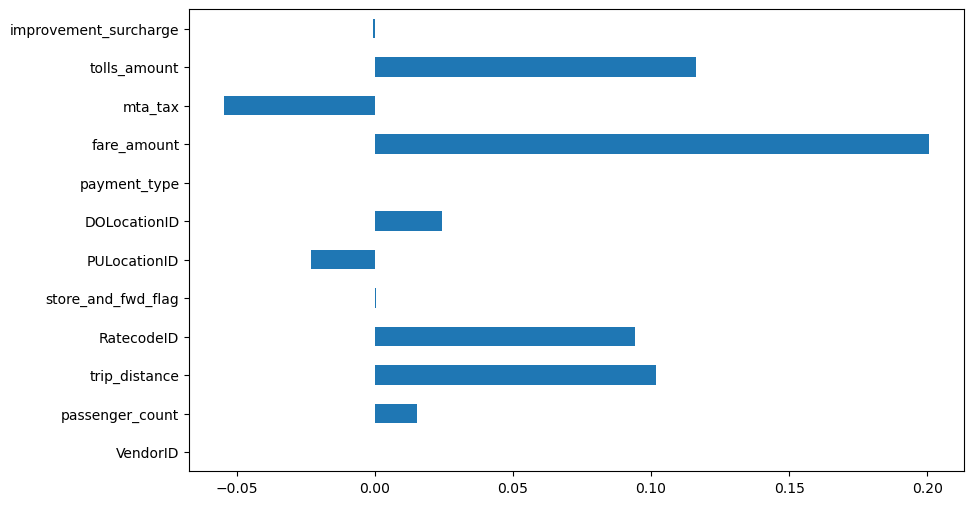

In [ ]:
correlation_values=df.corr()['tip_amount'].drop('tip_amount')
correlation_values.plot(kind='barh',figsize=(10,6))

In [ ]:
correlation_values

VendorID                      NaN
passenger_count          0.015081
trip_distance            0.101819
RatecodeID               0.094075
store_and_fwd_flag       0.000320
PULocationID            -0.023086
DOLocationID             0.024348
payment_type                  NaN
fare_amount              0.200638
mta_tax                 -0.054488
tolls_amount             0.116172
improvement_surcharge   -0.000727
Name: tip_amount, dtype: float64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41202 entries, 0 to 41201
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   VendorID               41202 non-null  int64  
 1   passenger_count        41202 non-null  int64  
 2   trip_distance          41202 non-null  float64
 3   RatecodeID             41202 non-null  int64  
 4   store_and_fwd_flag     41202 non-null  int64  
 5   PULocationID           41202 non-null  int64  
 6   DOLocationID           41202 non-null  int64  
 7   payment_type           41202 non-null  int64  
 8   fare_amount            41202 non-null  float64
 9   mta_tax                41202 non-null  float64
 10  tolls_amount           41202 non-null  float64
 11  improvement_surcharge  41202 non-null  int64  
 12  tip_amount             41202 non-null  float64
dtypes: float64(5), int64(8)
memory usage: 4.1 MB


In [ ]:
y=df[['tip_amount']].values.astype('float32')
porc_data=df.drop(['tip_amount'],axis=1)
x=porc_data.values
x=normalize(x,axis=1,norm='l1',copy=False)

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)


In [ ]:
tip_tree=DecisionTreeRegressor(criterion='squared_error',max_depth=4,random_state=35)
tip_tree.fit(x_train,y_train)

DecisionTreeRegressor(max_depth=4, random_state=35)

In [ ]:
y_pred=tip_tree.predict(x_test)
mse_score=mean_squared_error(y_test,y_pred)
r2_score=tip_tree.score(x_test,y_test)
print('MSE score : {0:.3f}'.format(mse_score))
print('R^2 score : {0:.3f}'.format(r2_score))



MSE score : 24.412
R^2 score : 0.034


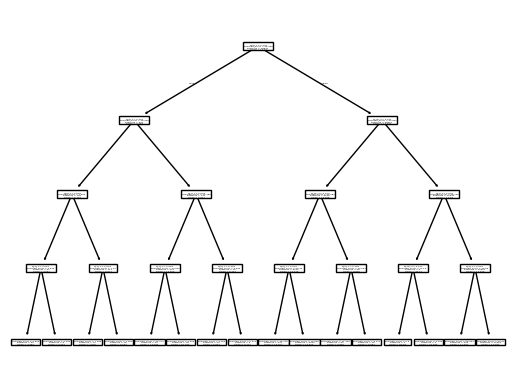

In [ ]:
plot_tree(tip_tree)
plt.show()

In [ ]:
correlation_values=df.corr()['tip_amount'].drop('tip_amount')
abs(correlation_values).sort_values(ascending=False)

fare_amount              0.200638
tolls_amount             0.116172
trip_distance            0.101819
RatecodeID               0.094075
mta_tax                  0.054488
DOLocationID             0.024348
PULocationID             0.023086
passenger_count          0.015081
improvement_surcharge    0.000727
store_and_fwd_flag       0.000320
VendorID                      NaN
payment_type                  NaN
Name: tip_amount, dtype: float64